# Introduction

Notebook to test five day forecast on 10 (out of 100 stocks).

In [14]:
import pandas as pd
from frankie import DayForecast
import gc; gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
LAGS=[1, 3, 5, 10, 20, 30]

## Test Five Day Forecast on MSFT

                           AR - TARCH/ZARCH Model Results                           
Dep. Variable:                        Close   R-squared:                       0.637
Mean Model:                              AR   Adj. R-squared:                  0.636
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -4559.92
Distribution:      Standardized Student's t   AIC:                           9143.85
Method:                  Maximum Likelihood   BIC:                           9212.89
                                              No. Observations:                 2329
Date:                      Fri, Feb 07 2020   Df Residuals:                     2317
Time:                              13:54:20   Df Model:                           12
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------

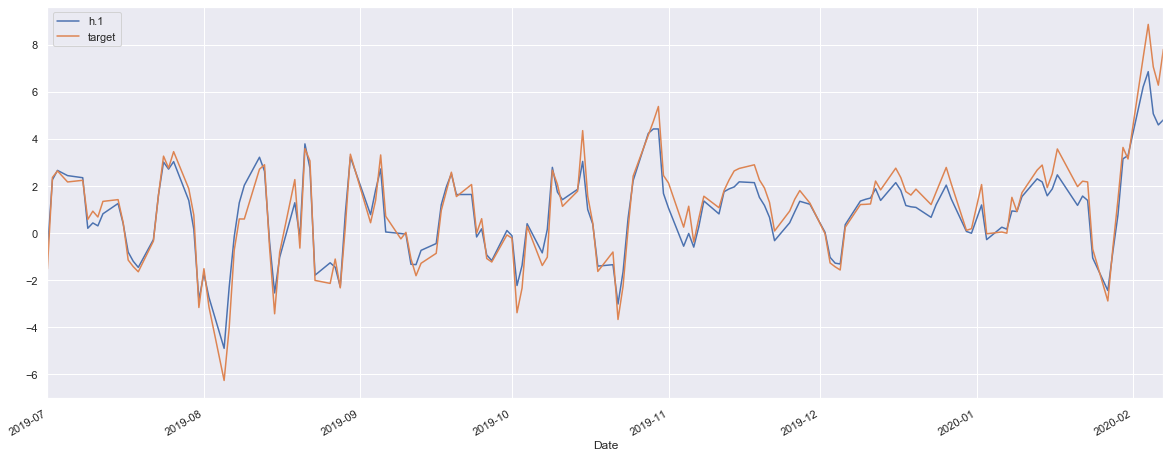

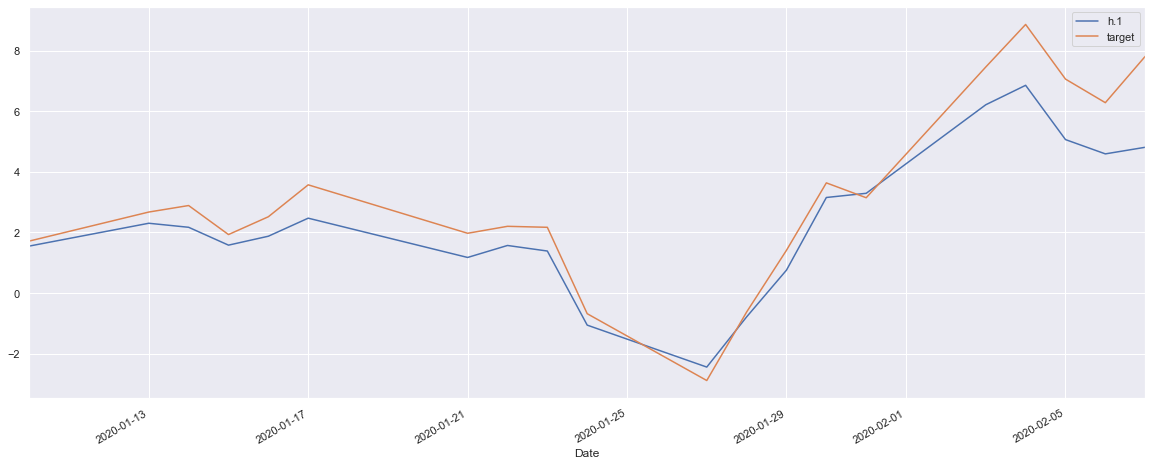

                 h.1    target
Date                          
2020-01-10  1.549733  1.714790
2020-01-13  2.302804  2.672452
2020-01-14  2.169941  2.887422
2020-01-15  1.580858  1.930164
2020-01-16  1.875043  2.517120
2020-01-17  2.470319  3.570100
2020-01-21  1.174664  1.972073
2020-01-22  1.569976  2.201937
2020-01-23  1.386713  2.169384
2020-01-24 -1.056987 -0.680026
2020-01-27 -2.440932 -2.884500
2020-01-28 -0.785373 -0.624625
2020-01-29  0.757152  1.412191
2020-01-30  3.152594  3.634837
2020-01-31  3.290624  3.144692
2020-02-03  6.211204  7.456248
2020-02-04  6.852696  8.860147
2020-02-05  5.062830  7.057843
2020-02-06  4.591060  6.279662
2020-02-07  4.808777  7.807085


In [4]:
myForecast = DayForecast(ticker="MSFT", period="10y", split_date="2019-07-01", days=5, lags=LAGS,
                        verbose=True)
tp_rate = myForecast.forecast(horizon=1, verbose=True)

## Read the Stocks

In [5]:
ls ../data

F13_Renaissance_tech.csv  F13_Renaissance_tech.txt  stocks.csv


In [6]:
sdf = pd.read_csv('../data/stocks.csv')
sdf = sdf.loc[sdf.TICKER > ''].reset_index()
del sdf['index']
sdf.head()

,NAME_OF_ISSUER,CUSIP,VALUE,SHRS_OR_PRN_AMT,SOLE_VOTING_AUTH,NO_VOTING_AUTH,TICKER
0,ADURO BIOTECH INC,00739L101,2902,2738200,2590838,147362,ADRO
1,AGILE THERAPEUTICS INC,00847L100,2876,2427100,2427100,0,AGRX
2,ALCOA CORP,013872106,130047,6479662,5941743,537919,AA
3,ALEXION PHARMACEUTICALS INC,015351109,279096,2849667,2849667,0,ALXN
4,AMERICAN TOWER CORP NEW,03027X100,336963,1523824,1523824,0,AMT


## Select Ten Stocks

In [7]:
idx = sdf.sample(10, random_state=42).index
sdf.loc[idx]

,NAME_OF_ISSUER,CUSIP,VALUE,SHRS_OR_PRN_AMT,SOLE_VOTING_AUTH,NO_VOTING_AUTH,TICKER
83,SPECTRUM PHARMACEUTICALS INC,84763A108,22936,2765017,2747310,17707,SPPI
53,MBIA INC,55262C100,2108,228374,146742,81632,MBI
70,PALO ALTO NETWORKS INC,697435105,1192028,5848150,5622490,225660,PANW
45,HANCOCK WHITNEY CORPORATION,410120109,9687,252962,252962,0,HWC
44,GULF RESOURCES INC,40251W309,1276,1830162,1828362,1800,GURE
39,GRACO INC,384109104,8329,180900,72895,108005,GGG
22,CVR ENERGY INC,12662P108,92673,2104769,2104769,0,CVI
80,SI BONE INC,825704109,723,40900,40900,0,SIBN
10,BMC STK HLDGS INC,05591B109,34168,1305100,1175955,129145,BMCH
0,ADURO BIOTECH INC,00739L101,2902,2738200,2590838,147362,ADRO


## Run Five Day Forecast on Ten Selected Stocks

83 SPPI (SPECTRUM PHARMACEUTICALS INC):

tn= 71 fn= 13 tp= 67 fp= 3

[[71 13]
 [ 3 67]]

TP/(FN+TP)= 0.8375 FN+TP= 80


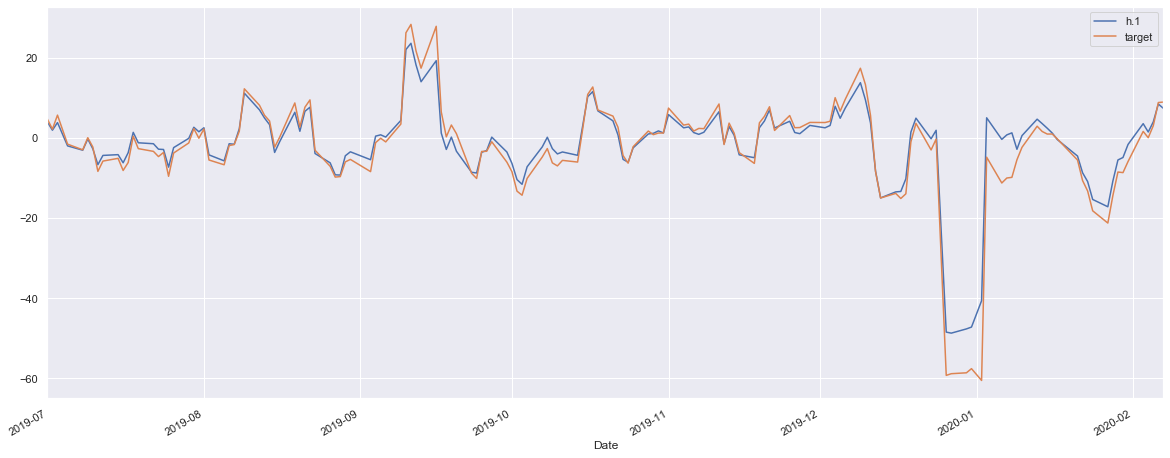

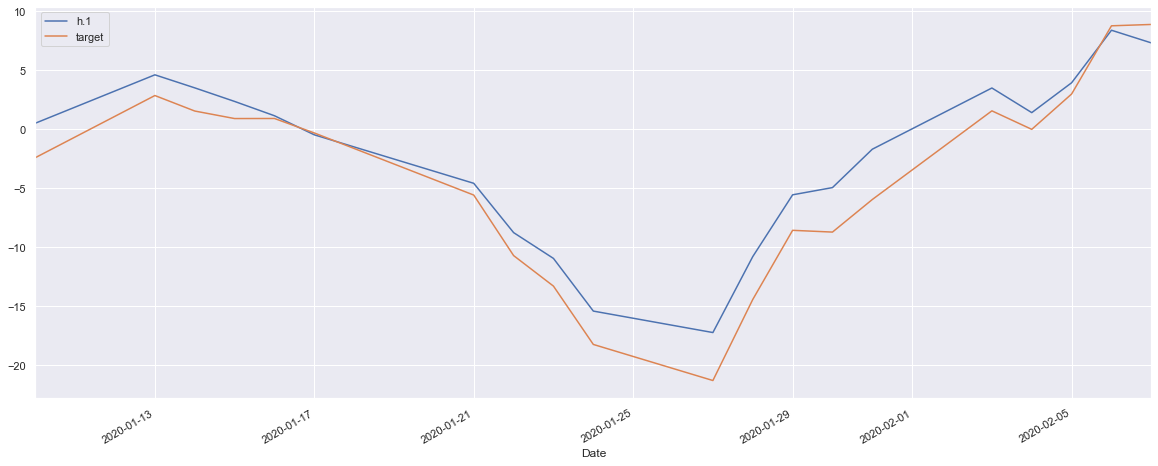

                  h.1     target
Date                            
2020-01-10   0.519766  -2.402402
2020-01-13   4.622667   2.866242
2020-01-14   3.516800   1.552795
2020-01-15   2.365949   0.914634
2020-01-16   1.152715   0.920245
2020-01-17  -0.464700  -0.307692
2020-01-21  -4.575805  -5.572755
2020-01-22  -8.755501 -10.703364
2020-01-23 -10.944126 -13.293051
2020-01-24 -15.408815 -18.237082
2020-01-27 -17.228680 -21.296296
2020-01-28 -10.790042 -14.426230
2020-01-29  -5.550690  -8.561644
2020-01-30  -4.938163  -8.710801
2020-01-31  -1.684041  -5.947955
2020-02-03   3.505923   1.568627
2020-02-04   1.417982   0.000000
2020-02-05   3.949470   2.996255
2020-02-06   8.402624   8.778626
2020-02-07   7.329406   8.893281

53 MBI (MBIA INC):

tn= 81 fn= 3 tp= 64 fp= 6

[[81  3]
 [ 6 64]]

TP/(FN+TP)= 0.9552238805970149 FN+TP= 67


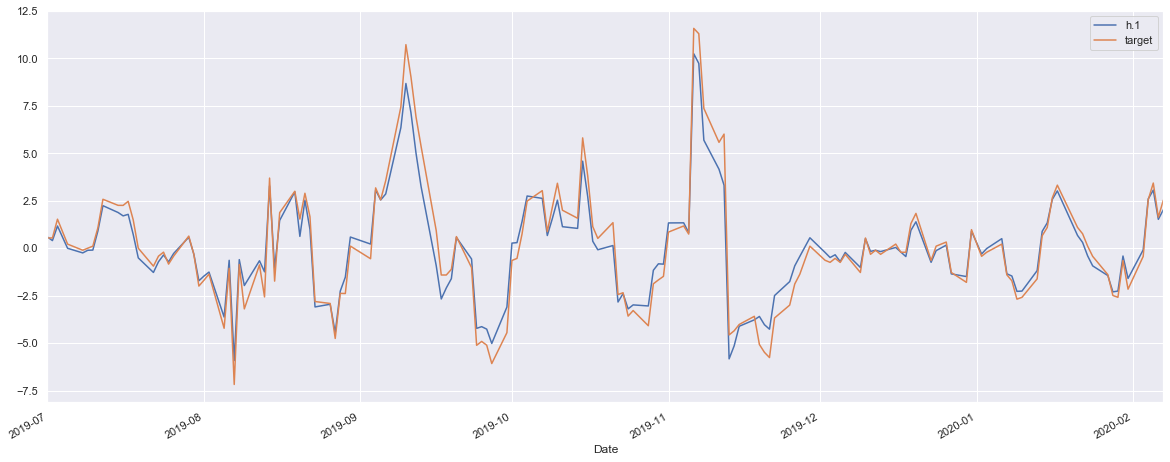

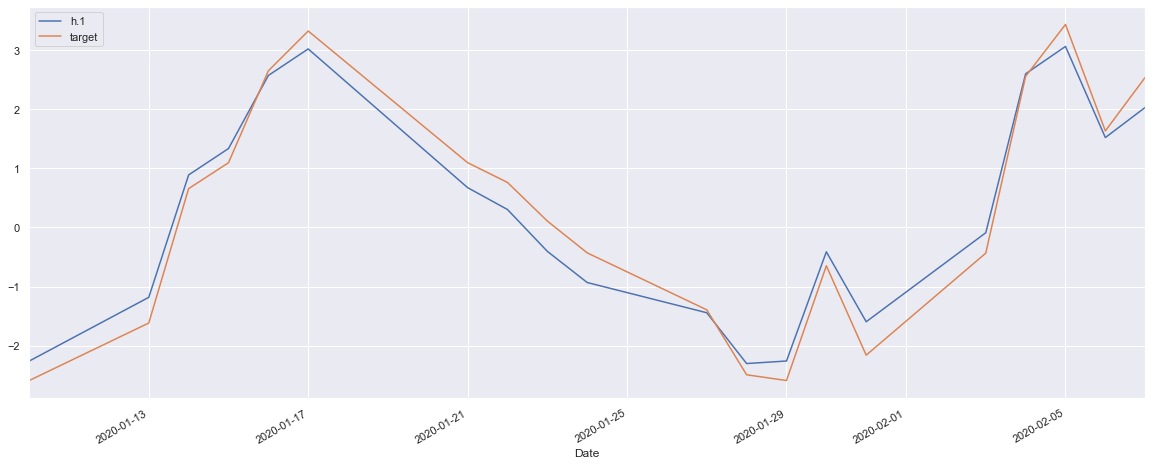

                 h.1    target
Date                          
2020-01-10 -2.259967 -2.588997
2020-01-13 -1.182183 -1.616379
2020-01-14  0.888058  0.656455
2020-01-15  1.334151  1.094092
2020-01-16  2.570067  2.649007
2020-01-17  3.019100  3.322259
2020-01-21  0.672971  1.095290
2020-01-22  0.303087  0.760870
2020-01-23 -0.404332  0.108225
2020-01-24 -0.931454 -0.430108
2020-01-27 -1.442647 -1.393355
2020-01-28 -2.301902 -2.491874
2020-01-29 -2.258906 -2.588997
2020-01-30 -0.412496 -0.648649
2020-01-31 -1.595098 -2.159827
2020-02-03 -0.089653 -0.434783
2020-02-04  2.598222  2.555556
2020-02-05  3.061263  3.433001
2020-02-06  1.520257  1.632209
2020-02-07  2.029696  2.538631

70 PANW (PALO ALTO NETWORKS INC):

tn= 42 fn= 7 tp= 102 fp= 3

[[ 42   7]
 [  3 102]]

TP/(FN+TP)= 0.9357798165137615 FN+TP= 109


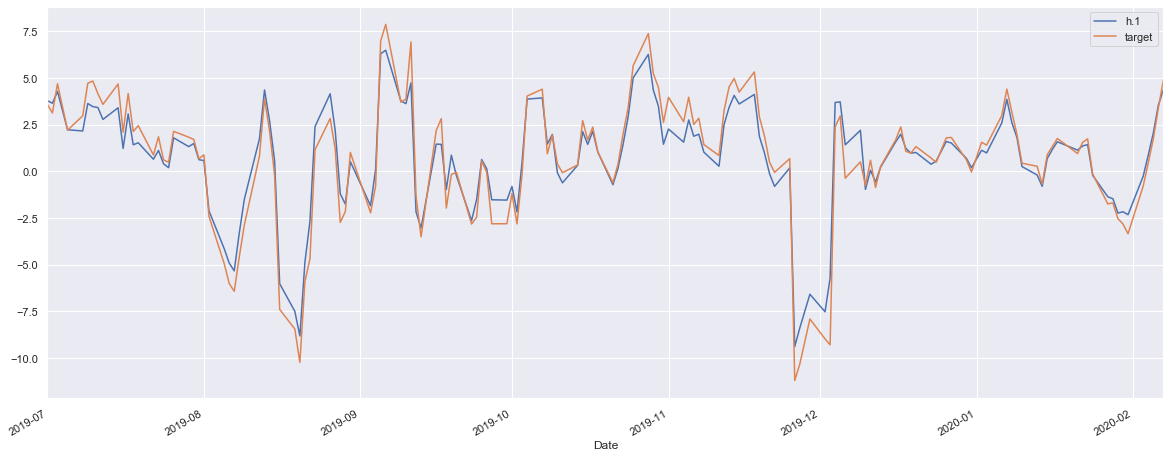

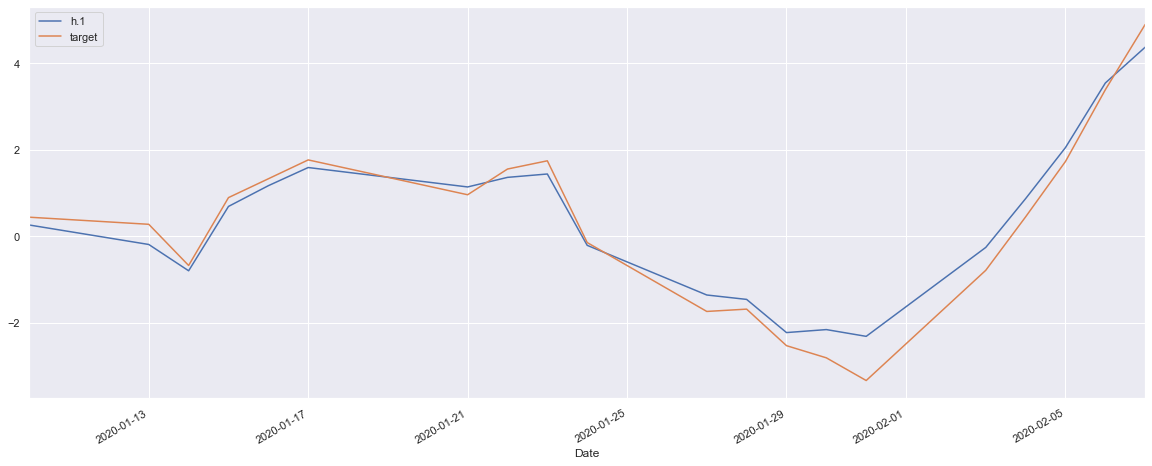

                 h.1    target
Date                          
2020-01-10  0.258778  0.439134
2020-01-13 -0.192542  0.274702
2020-01-14 -0.801782 -0.678696
2020-01-15  0.688459  0.892820
2020-01-16  1.168620  1.328779
2020-01-17  1.589319  1.765670
2020-01-21  1.139557  0.958825
2020-01-22  1.361346  1.554167
2020-01-23  1.439514  1.744911
2020-01-24 -0.212652 -0.147990
2020-01-27 -1.362412 -1.743297
2020-01-28 -1.464487 -1.689759
2020-01-29 -2.232687 -2.535593
2020-01-30 -2.163329 -2.817477
2020-01-31 -2.320177 -3.342939
2020-02-03 -0.260492 -0.790414
2020-02-04  0.869616  0.447474
2020-02-05  2.052029  1.730162
2020-02-06  3.546709  3.390756
2020-02-07  4.376177  4.902462

45 HWC (HANCOCK WHITNEY CORPORATION):

tn= 70 fn= 5 tp= 72 fp= 7

[[70  5]
 [ 7 72]]

TP/(FN+TP)= 0.935064935064935 FN+TP= 77


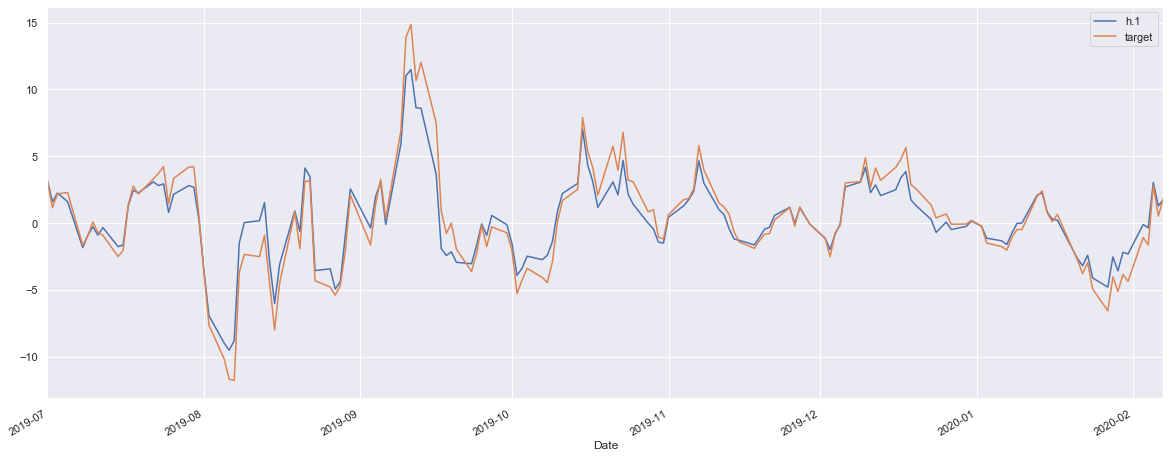

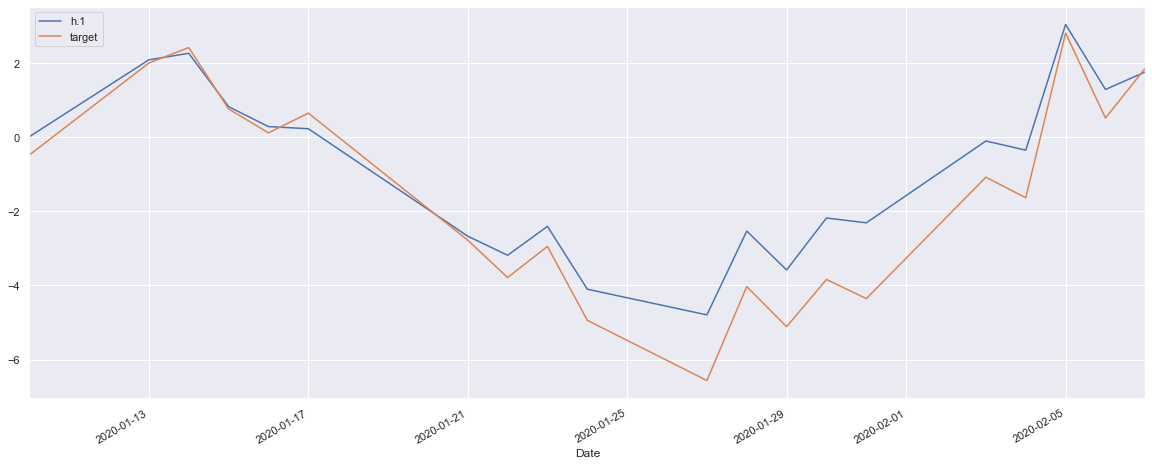

                 h.1    target
Date                          
2020-01-10  0.010439 -0.482870
2020-01-13  2.084974  1.998606
2020-01-14  2.260882  2.415235
2020-01-15  0.821290  0.760194
2020-01-16  0.283685  0.114521
2020-01-17  0.226103  0.646950
2020-01-21 -2.671681 -2.779676
2020-01-22 -3.186558 -3.786848
2020-01-23 -2.407591 -2.949246
2020-01-24 -4.102938 -4.941661
2020-01-27 -4.795175 -6.565657
2020-01-28 -2.535368 -4.030935
2020-01-29 -3.583215 -5.114306
2020-01-30 -2.181802 -3.839812
2020-01-31 -2.312386 -4.356197
2020-02-03 -0.104603 -1.081081
2020-02-04 -0.351319 -1.636142
2020-02-05  3.038803  2.806756
2020-02-06  1.284376  0.514454
2020-02-07  1.758507  1.862104

44 GURE (GULF RESOURCES INC):

tn= 92 fn= 9 tp= 52 fp= 1

[[92  9]
 [ 1 52]]

TP/(FN+TP)= 0.8524590163934426 FN+TP= 61


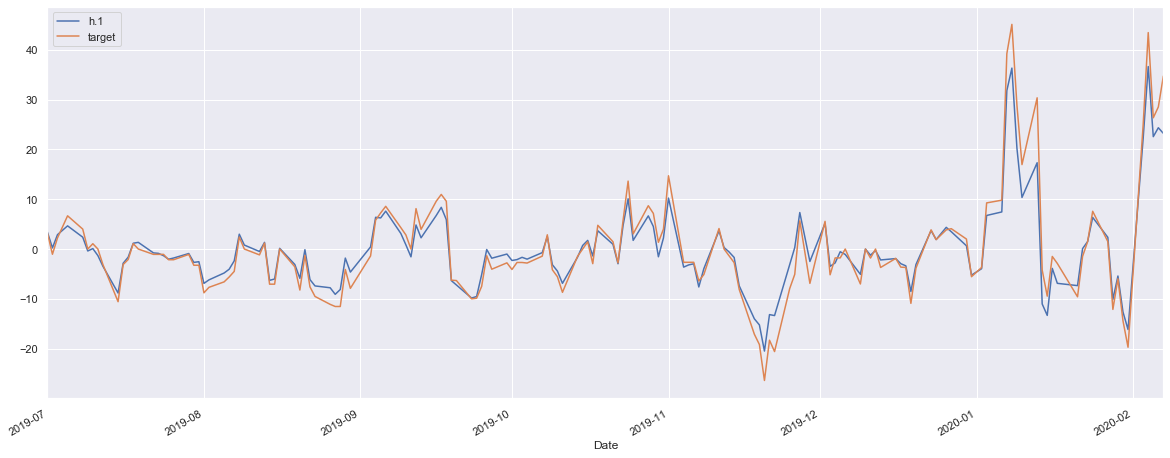

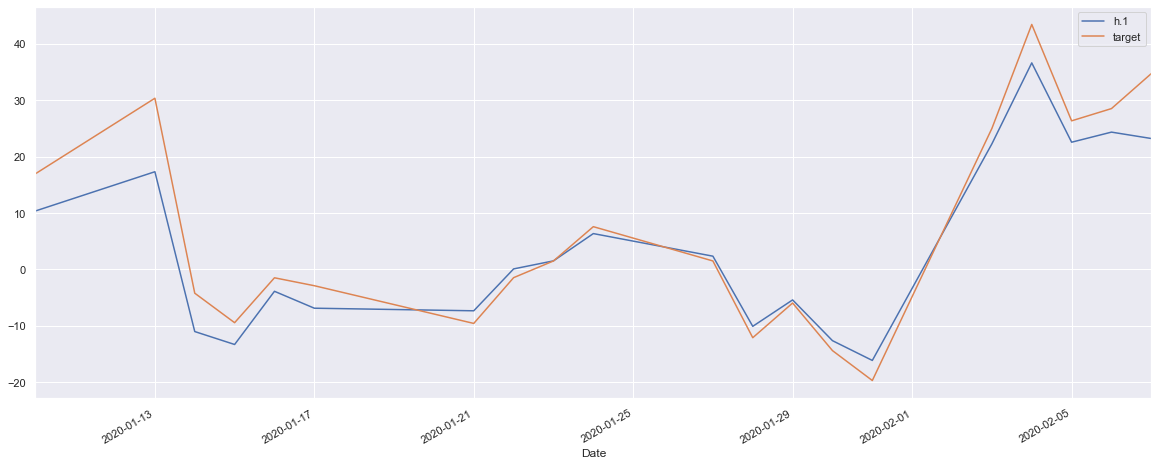

                  h.1     target
Date                            
2020-01-10  10.354028  16.949153
2020-01-13  17.321664  30.357143
2020-01-14 -11.031147  -4.225352
2020-01-15 -13.324791  -9.459459
2020-01-16  -3.889880  -1.492537
2020-01-17  -6.888790  -2.898551
2020-01-21  -7.348103  -9.589041
2020-01-22   0.081679  -1.470588
2020-01-23   1.508184   1.492537
2020-01-24   6.348528   7.575758
2020-01-27   2.341042   1.492537
2020-01-28 -10.106105 -12.121212
2020-01-29  -5.418244  -5.970149
2020-01-30 -12.647140 -14.411765
2020-01-31 -16.155356 -19.718310
2020-02-03  22.265975  25.000000
2020-02-04  36.629813  43.448276
2020-02-05  22.557855  26.349206
2020-02-06  24.347776  28.522337
2020-02-07  23.213358  34.736842

39 GGG (GRACO INC):

tn= 49 fn= 7 tp= 94 fp= 4

[[49  7]
 [ 4 94]]

TP/(FN+TP)= 0.9306930693069307 FN+TP= 101


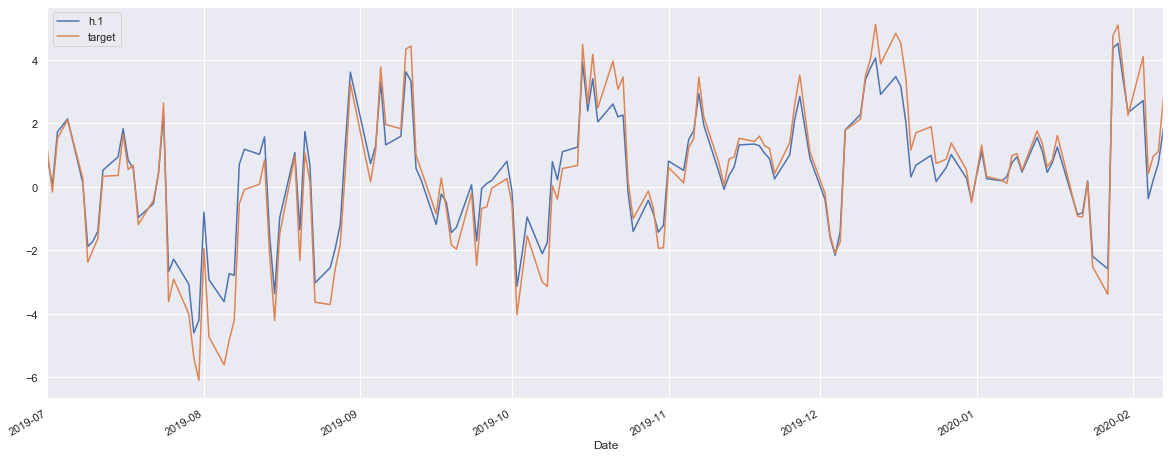

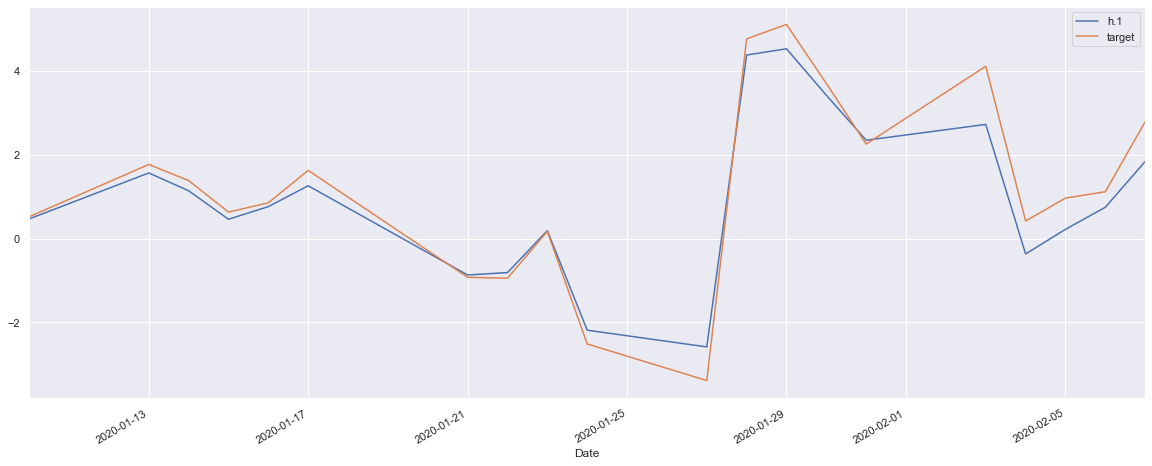

                 h.1    target
Date                          
2020-01-10  0.467569  0.518433
2020-01-13  1.562592  1.765157
2020-01-14  1.139030  1.381427
2020-01-15  0.459361  0.630493
2020-01-16  0.760400  0.851144
2020-01-17  1.257078  1.623687
2020-01-21 -0.869249 -0.923831
2020-01-22 -0.811024 -0.946253
2020-01-23  0.188881  0.170875
2020-01-24 -2.183923 -2.513128
2020-01-27 -2.581910 -3.383459
2020-01-28  4.372722  4.757374
2020-01-29  4.521708  5.101261
2020-01-30  3.414297  3.695982
2020-01-31  2.342402  2.250866
2020-02-03  2.719156  4.105058
2020-02-04 -0.367970  0.417802
2020-02-05  0.219229  0.963461
2020-02-06  0.745214  1.114970
2020-02-07  1.836857  2.784572

22 CVI (CVR ENERGY INC):

tn= 82 fn= 8 tp= 60 fp= 4

[[82  8]
 [ 4 60]]

TP/(FN+TP)= 0.8823529411764706 FN+TP= 68


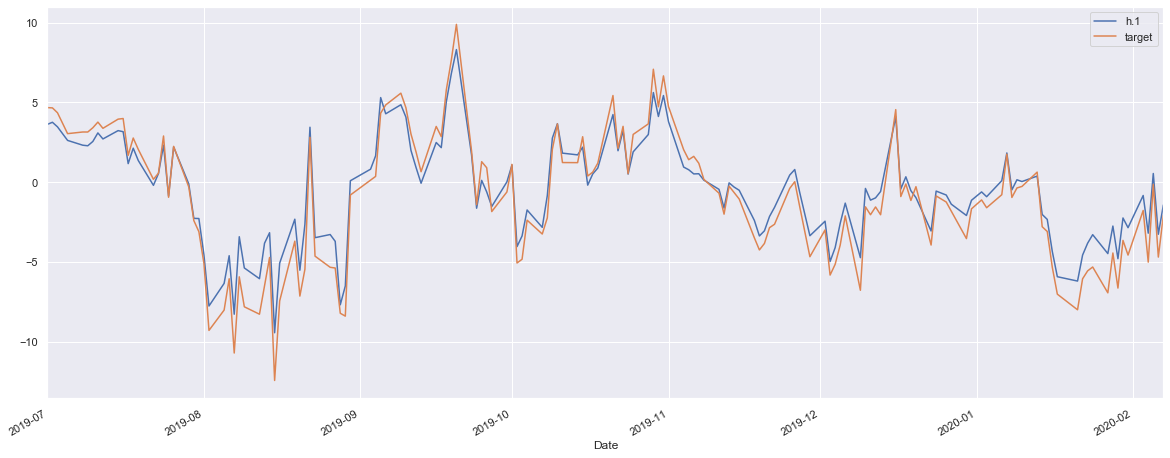

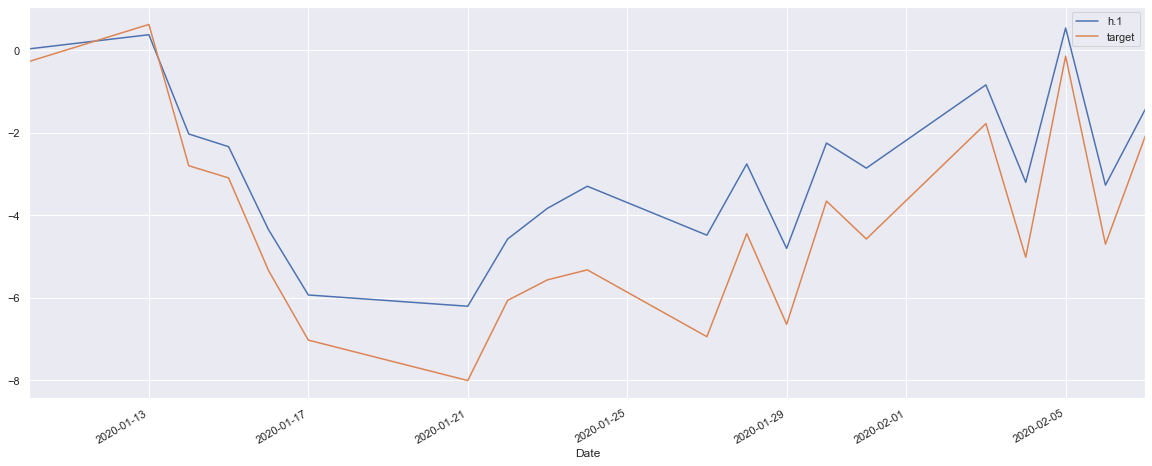

                 h.1    target
Date                          
2020-01-10  0.032445 -0.272412
2020-01-13  0.374843  0.623597
2020-01-14 -2.031134 -2.800295
2020-01-15 -2.339249 -3.096903
2020-01-16 -4.348242 -5.337287
2020-01-17 -5.933332 -7.027564
2020-01-21 -6.206612 -8.006941
2020-01-22 -4.577460 -6.065201
2020-01-23 -3.832491 -5.567010
2020-01-24 -3.297621 -5.324980
2020-01-27 -4.484223 -6.944444
2020-01-28 -2.757986 -4.446241
2020-01-29 -4.804654 -6.645144
2020-01-30 -2.250396 -3.657205
2020-01-31 -2.858962 -4.576785
2020-02-03 -0.841144 -1.779564
2020-02-04 -3.203368 -5.019741
2020-02-05  0.537954 -0.144092
2020-02-06 -3.271613 -4.702550
2020-02-07 -1.431138 -2.080324

80 SIBN (SI BONE INC):

tn= 62 fn= 8 tp= 68 fp= 16

[[62  8]
 [16 68]]

TP/(FN+TP)= 0.8947368421052632 FN+TP= 76


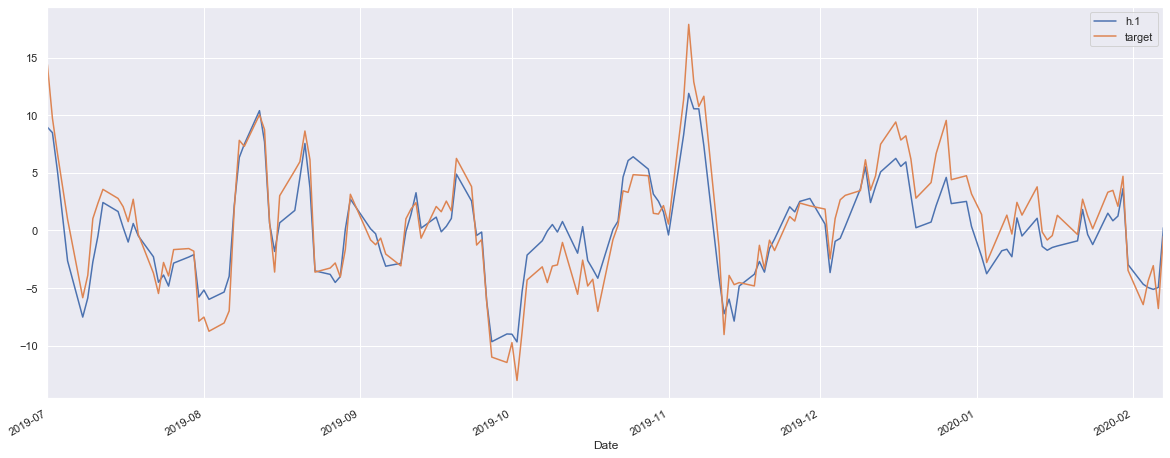

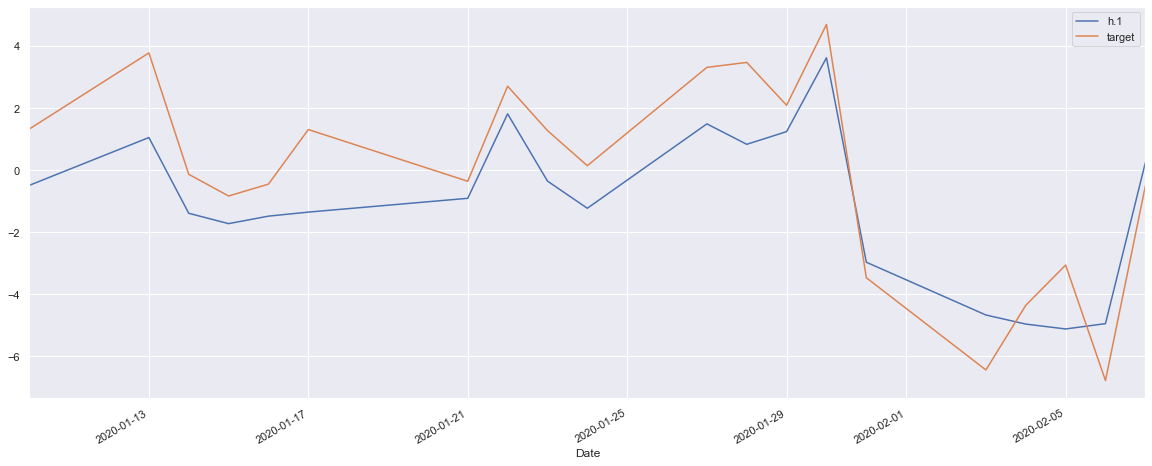

                 h.1    target
Date                          
2020-01-10 -0.495372  1.320755
2020-01-13  1.045644  3.775366
2020-01-14 -1.397413 -0.139600
2020-01-15 -1.731169 -0.839944
2020-01-16 -1.489234 -0.455789
2020-01-17 -1.358875  1.303538
2020-01-21 -0.913831 -0.363802
2020-01-22  1.809652  2.702703
2020-01-23 -0.358036  1.270588
2020-01-24 -1.235003  0.137363
2020-01-27  1.486698  3.308824
2020-01-28  0.827554  3.468736
2020-01-29  1.236909  2.087114
2020-01-30  3.618601  4.693309
2020-01-31 -2.975336 -3.475080
2020-02-03 -4.677484 -6.450178
2020-02-04 -4.970548 -4.367005
2020-02-05 -5.128064 -3.066667
2020-02-06 -4.956093 -6.790945
2020-02-07  0.233270 -0.521080

10 BMCH (BMC STK HLDGS INC):

tn= 60 fn= 3 tp= 84 fp= 7

[[60  3]
 [ 7 84]]

TP/(FN+TP)= 0.9655172413793104 FN+TP= 87


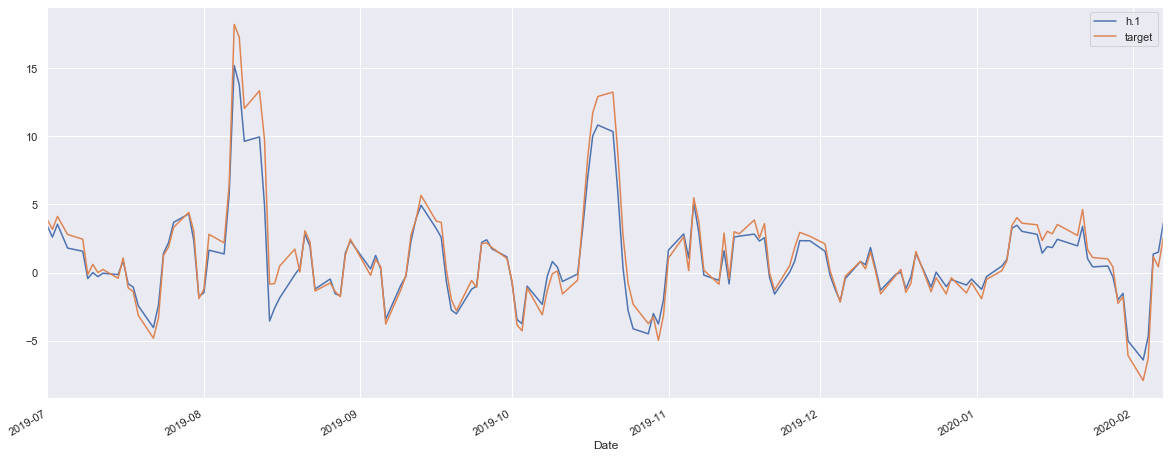

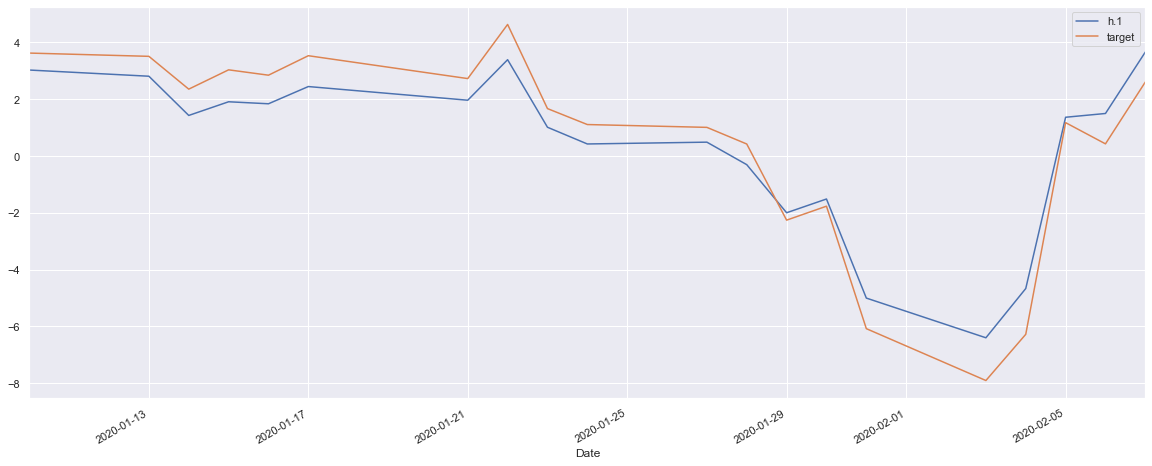

                 h.1    target
Date                          
2020-01-10  3.025016  3.622431
2020-01-13  2.807186  3.507565
2020-01-14  1.426502  2.352540
2020-01-15  1.907824  3.032345
2020-01-16  1.837254  2.843760
2020-01-17  2.443663  3.529412
2020-01-21  1.962512  2.724252
2020-01-22  3.389071  4.630247
2020-01-23  1.010874  1.667757
2020-01-24  0.421926  1.106051
2020-01-27  0.485634  1.006494
2020-01-28 -0.306798  0.420440
2020-01-29 -1.999961 -2.260427
2020-01-30 -1.515809 -1.769058
2020-01-31 -5.004458 -6.081081
2020-02-03 -6.402222 -7.907425
2020-02-04 -4.667945 -6.280193
2020-02-05  1.362713  1.172638
2020-02-06  1.495254  0.425671
2020-02-07  3.659076  2.603631

0 ADRO (ADURO BIOTECH INC):

tn= 81 fn= 10 tp= 59 fp= 4

[[81 10]
 [ 4 59]]

TP/(FN+TP)= 0.855072463768116 FN+TP= 69


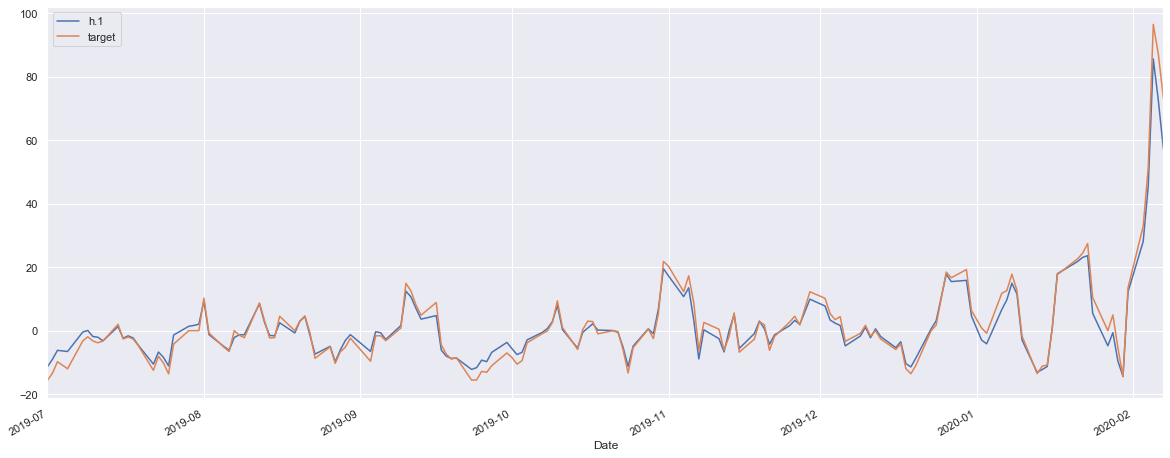

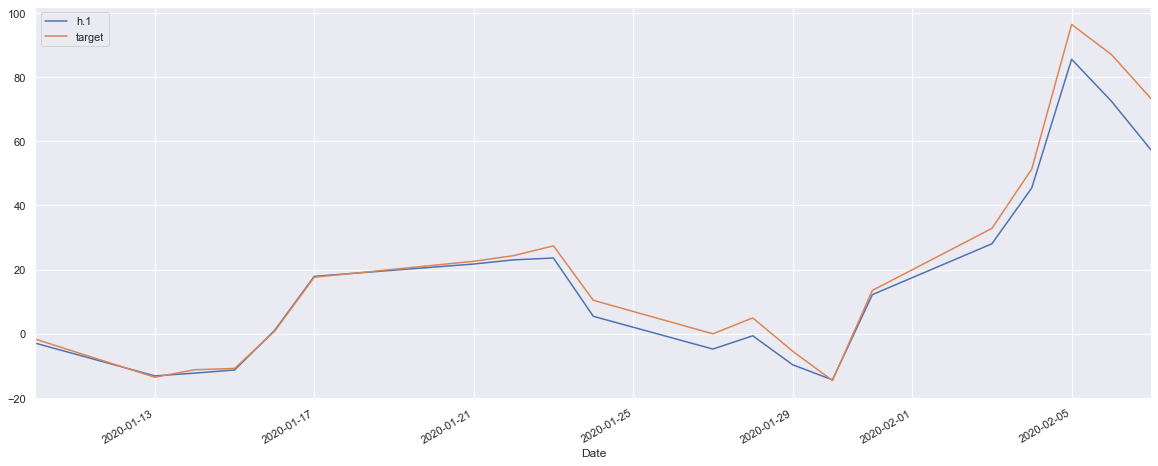

                  h.1     target
Date                            
2020-01-10  -2.912654  -1.652893
2020-01-13 -13.126292 -13.533835
2020-01-14 -12.242305 -11.194030
2020-01-15 -11.269511 -10.791367
2020-01-16   1.011080   0.751880
2020-01-17  17.916212  17.647059
2020-01-21  21.758568  22.608696
2020-01-22  23.055482  24.369748
2020-01-23  23.621025  27.419355
2020-01-24   5.453846  10.447761
2020-01-27  -4.748536   0.000000
2020-01-28  -0.610308   4.964539
2020-01-29  -9.633203  -5.405405
2020-01-30 -14.353233 -14.556962
2020-01-31  12.212032  13.513514
2020-02-03  28.060521  32.857143
2020-02-04  45.478674  51.351351
2020-02-05  85.575657  96.428571
2020-02-06  72.491092  87.037037
2020-02-07  57.201832  73.214286



In [8]:
for i, ticker in zip(idx, sdf['TICKER'].loc[idx]):
    name_of_issuer = sdf['NAME_OF_ISSUER'].loc[i]
    print(f"{i} {ticker} ({name_of_issuer}):"); print("="*(7+len(ticker)+len(name_of_issuer)))
    print('')
    
    myForecast = DayForecast(ticker=ticker, period="10y", split_date="2019-07-01", days=5, lags=LAGS,
                            verbose=False)
    tp_rate = myForecast.forecast(horizon=1, verbose=True)
    print('')

## Find Optimal Parameters for Selected Ten Stocks for 'n' Day Forecast

In [9]:
day_list = [1, 3, 5, 10]
for day in day_list:
    sdf['up'+str(day)+'_period'] = ''
    sdf['up'+str(day)+'_lags'] = ''
    sdf['up'+str(day)+'_tpr'] = 0

In [10]:
sdf.columns

Index(['NAME_OF_ISSUER', 'CUSIP', 'VALUE', 'SHRS_OR_PRN_AMT',
       'SOLE_VOTING_AUTH', 'NO_VOTING_AUTH', 'TICKER', 'up1_period',
       'up1_lags', 'up1_tpr', 'up3_period', 'up3_lags', 'up3_tpr',
       'up5_period', 'up5_lags', 'up5_tpr', 'up10_period', 'up10_lags',
       'up10_tpr'],
      dtype='object')

In [11]:
lags_list = [ [1, 3],
              [1, 3, 5],
              [1, 3, 5, 10],
              [1, 3, 5, 10, 20],
              [1, 3, 5, 10, 20, 30],
              [1, 3, 5, 10, 20, 30, 45],
              [1, 3, 5, 10, 20, 30, 45],
              [1, 3, 5, 10, 20, 30, 45, 60]]

period_list = [ "3y", "5y", "8y", "10y", "15y", "20y"]


for i, ticker in zip(idx, sdf['TICKER'].loc[idx]):
    name_of_issuer = sdf['NAME_OF_ISSUER'].loc[i]
    print(f"{i} {ticker} ({name_of_issuer}):"); print("="*(7+len(ticker)+len(name_of_issuer)))
    print('')

    for day in day_list:
        print(f'{day}-day forecast:')

        best_lags = None
        best_period = None
        best_tp_rate = -1

        for period in period_list:
            # print('')
            # print("period:", period)
            # print('')
            for lags in lags_list:   
                myForecast = DayForecast(ticker=ticker, period=period, split_date="2019-07-01", 
                                         days=day, lags=lags, verbose=False)
                tp_rate = myForecast.forecast(horizon=1, verbose=False)
                # print('lags=', lags, 'tp_rate=', tp_rate)
                if tp_rate > best_tp_rate:
                    best_period, best_lags, best_tp_rate = period, lags, tp_rate

        print('best_period=', best_period)
        print('best_tp_rate=', best_tp_rate)
        print("best_lags=", best_lags)
        print("")

        sdf['up'+str(day)+'_period'].loc[sdf['TICKER'] == ticker] = best_period
        sdf['up'+str(day)+'_lags'].loc[sdf['TICKER'] == ticker]   = ','.join(map(str, best_lags))
        sdf['up'+str(day)+'_tpr'].loc[sdf['TICKER'] == ticker]    = best_tp_rate

83 SPPI (SPECTRUM PHARMACEUTICALS INC):

1-day forecast:
best_period= 20y
best_tp_rate= 0.9565217391304348
best_lags= [1, 3]

3-day forecast:
best_period= 3y
best_tp_rate= 0.9090909090909091
best_lags= [1, 3, 5, 10]

5-day forecast:
best_period= 3y
best_tp_rate= 0.918918918918919
best_lags= [1, 3]

10-day forecast:
best_period= 3y
best_tp_rate= 0.9701492537313433
best_lags= [1, 3, 5]

53 MBI (MBIA INC):

1-day forecast:
best_period= 8y
best_tp_rate= 1.0
best_lags= [1, 3]

3-day forecast:
best_period= 8y
best_tp_rate= 0.8787878787878788
best_lags= [1, 3]

5-day forecast:
best_period= 3y
best_tp_rate= 0.9705882352941176
best_lags= [1, 3]

10-day forecast:
best_period= 3y
best_tp_rate= 0.9855072463768116
best_lags= [1, 3]

70 PANW (PALO ALTO NETWORKS INC):

1-day forecast:
best_period= 8y
best_tp_rate= 0.577922077922078
best_lags= [1, 3]

3-day forecast:
best_period= 5y
best_tp_rate= 0.9583333333333334
best_lags= [1, 3]

5-day forecast:
best_period= 3y
best_tp_rate= 0.9722222222222222
bes

In [12]:
sdf.loc[idx].head(10)

,NAME_OF_ISSUER,CUSIP,VALUE,SHRS_OR_PRN_AMT,SOLE_VOTING_AUTH,NO_VOTING_AUTH,TICKER,up1_period,up1_lags,up1_tpr,up3_period,up3_lags,up3_tpr,up5_period,up5_lags,up5_tpr,up10_period,up10_lags,up10_tpr
83,SPECTRUM PHARMACEUTICALS INC,84763A108,22936,2765017,2747310,17707,SPPI,20y,"1,3",0.956522,3y,"1,3,5,10",0.909091,3y,"1,3",0.918919,3y,"1,3,5",0.970149
53,MBIA INC,55262C100,2108,228374,146742,81632,MBI,8y,"1,3",1.000000,8y,"1,3",0.878788,3y,"1,3",0.970588,3y,"1,3",0.985507
70,PALO ALTO NETWORKS INC,697435105,1192028,5848150,5622490,225660,PANW,8y,"1,3",0.577922,5y,"1,3",0.958333,3y,"1,3",0.972222,5y,"1,3",1.000000
45,HANCOCK WHITNEY CORPORATION,410120109,9687,252962,252962,0,HWC,8y,"1,3,5,10,20,30",0.482456,5y,"1,3",0.880000,15y,"1,3",0.974684,3y,"1,3",1.000000
44,GULF RESOURCES INC,40251W309,1276,1830162,1828362,1800,GURE,10y,"1,3",0.157895,5y,"1,3",0.784615,3y,"1,3",0.929825,3y,"1,3",1.000000
39,GRACO INC,384109104,8329,180900,72895,108005,GGG,20y,"1,3",0.549020,5y,"1,3",0.902174,3y,"1,3,5,10,20",0.969697,15y,"1,3,5",0.989247
22,CVR ENERGY INC,12662P108,92673,2104769,2104769,0,CVI,8y,"1,3,5,10,20,30,45",0.581633,8y,"1,3",0.882353,5y,"1,3",0.955224,5y,"1,3",1.000000
80,SI BONE INC,825704109,723,40900,40900,0,SIBN,3y,"1,3",0.900000,3y,"1,3,5,10,20,30,45,60",0.904110,3y,"1,3",1.000000,3y,"1,3",0.977528
10,BMC STK HLDGS INC,05591B109,34168,1305100,1175955,129145,BMCH,5y,"1,3,5",0.680000,3y,"1,3",0.987500,3y,"1,3,5",0.976744,3y,"1,3",1.000000
0,ADURO BIOTECH INC,00739L101,2902,2738200,2590838,147362,ADRO,3y,"1,3",0.924242,3y,"1,3",0.942029,5y,"1,3",0.897059,3y,"1,3",0.956522


In [15]:
gc.collect()

80

## Rerun Five Day Forecast on Ten Selected Stocks with Optimal Parameters

In [ ]:
for i, ticker in zip(idx, sdf['TICKER'].loc[idx]):
    name_of_issuer = sdf['NAME_OF_ISSUER'].loc[i]
    print(f"{i} {ticker} ({name_of_issuer}):"); print("="*(7+len(ticker)+len(name_of_issuer)))
    print('')
    
    period = sdf['period'].loc[i]
    lags = [int(x) for x in sdf['lags'].loc[i].split(',')]
    print('period=', period)
    print('lags=', lags)
    
    myForecast = DayForecast(ticker=ticker, period=period, split_date="2019-07-01", days=5, lags=lags,
                            verbose=False)
    tp_rate = myForecast.forecast(horizon=1, verbose=True)
    print('')